# Water Mark

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
plt.rcParams['image.cmap'] = 'gray'

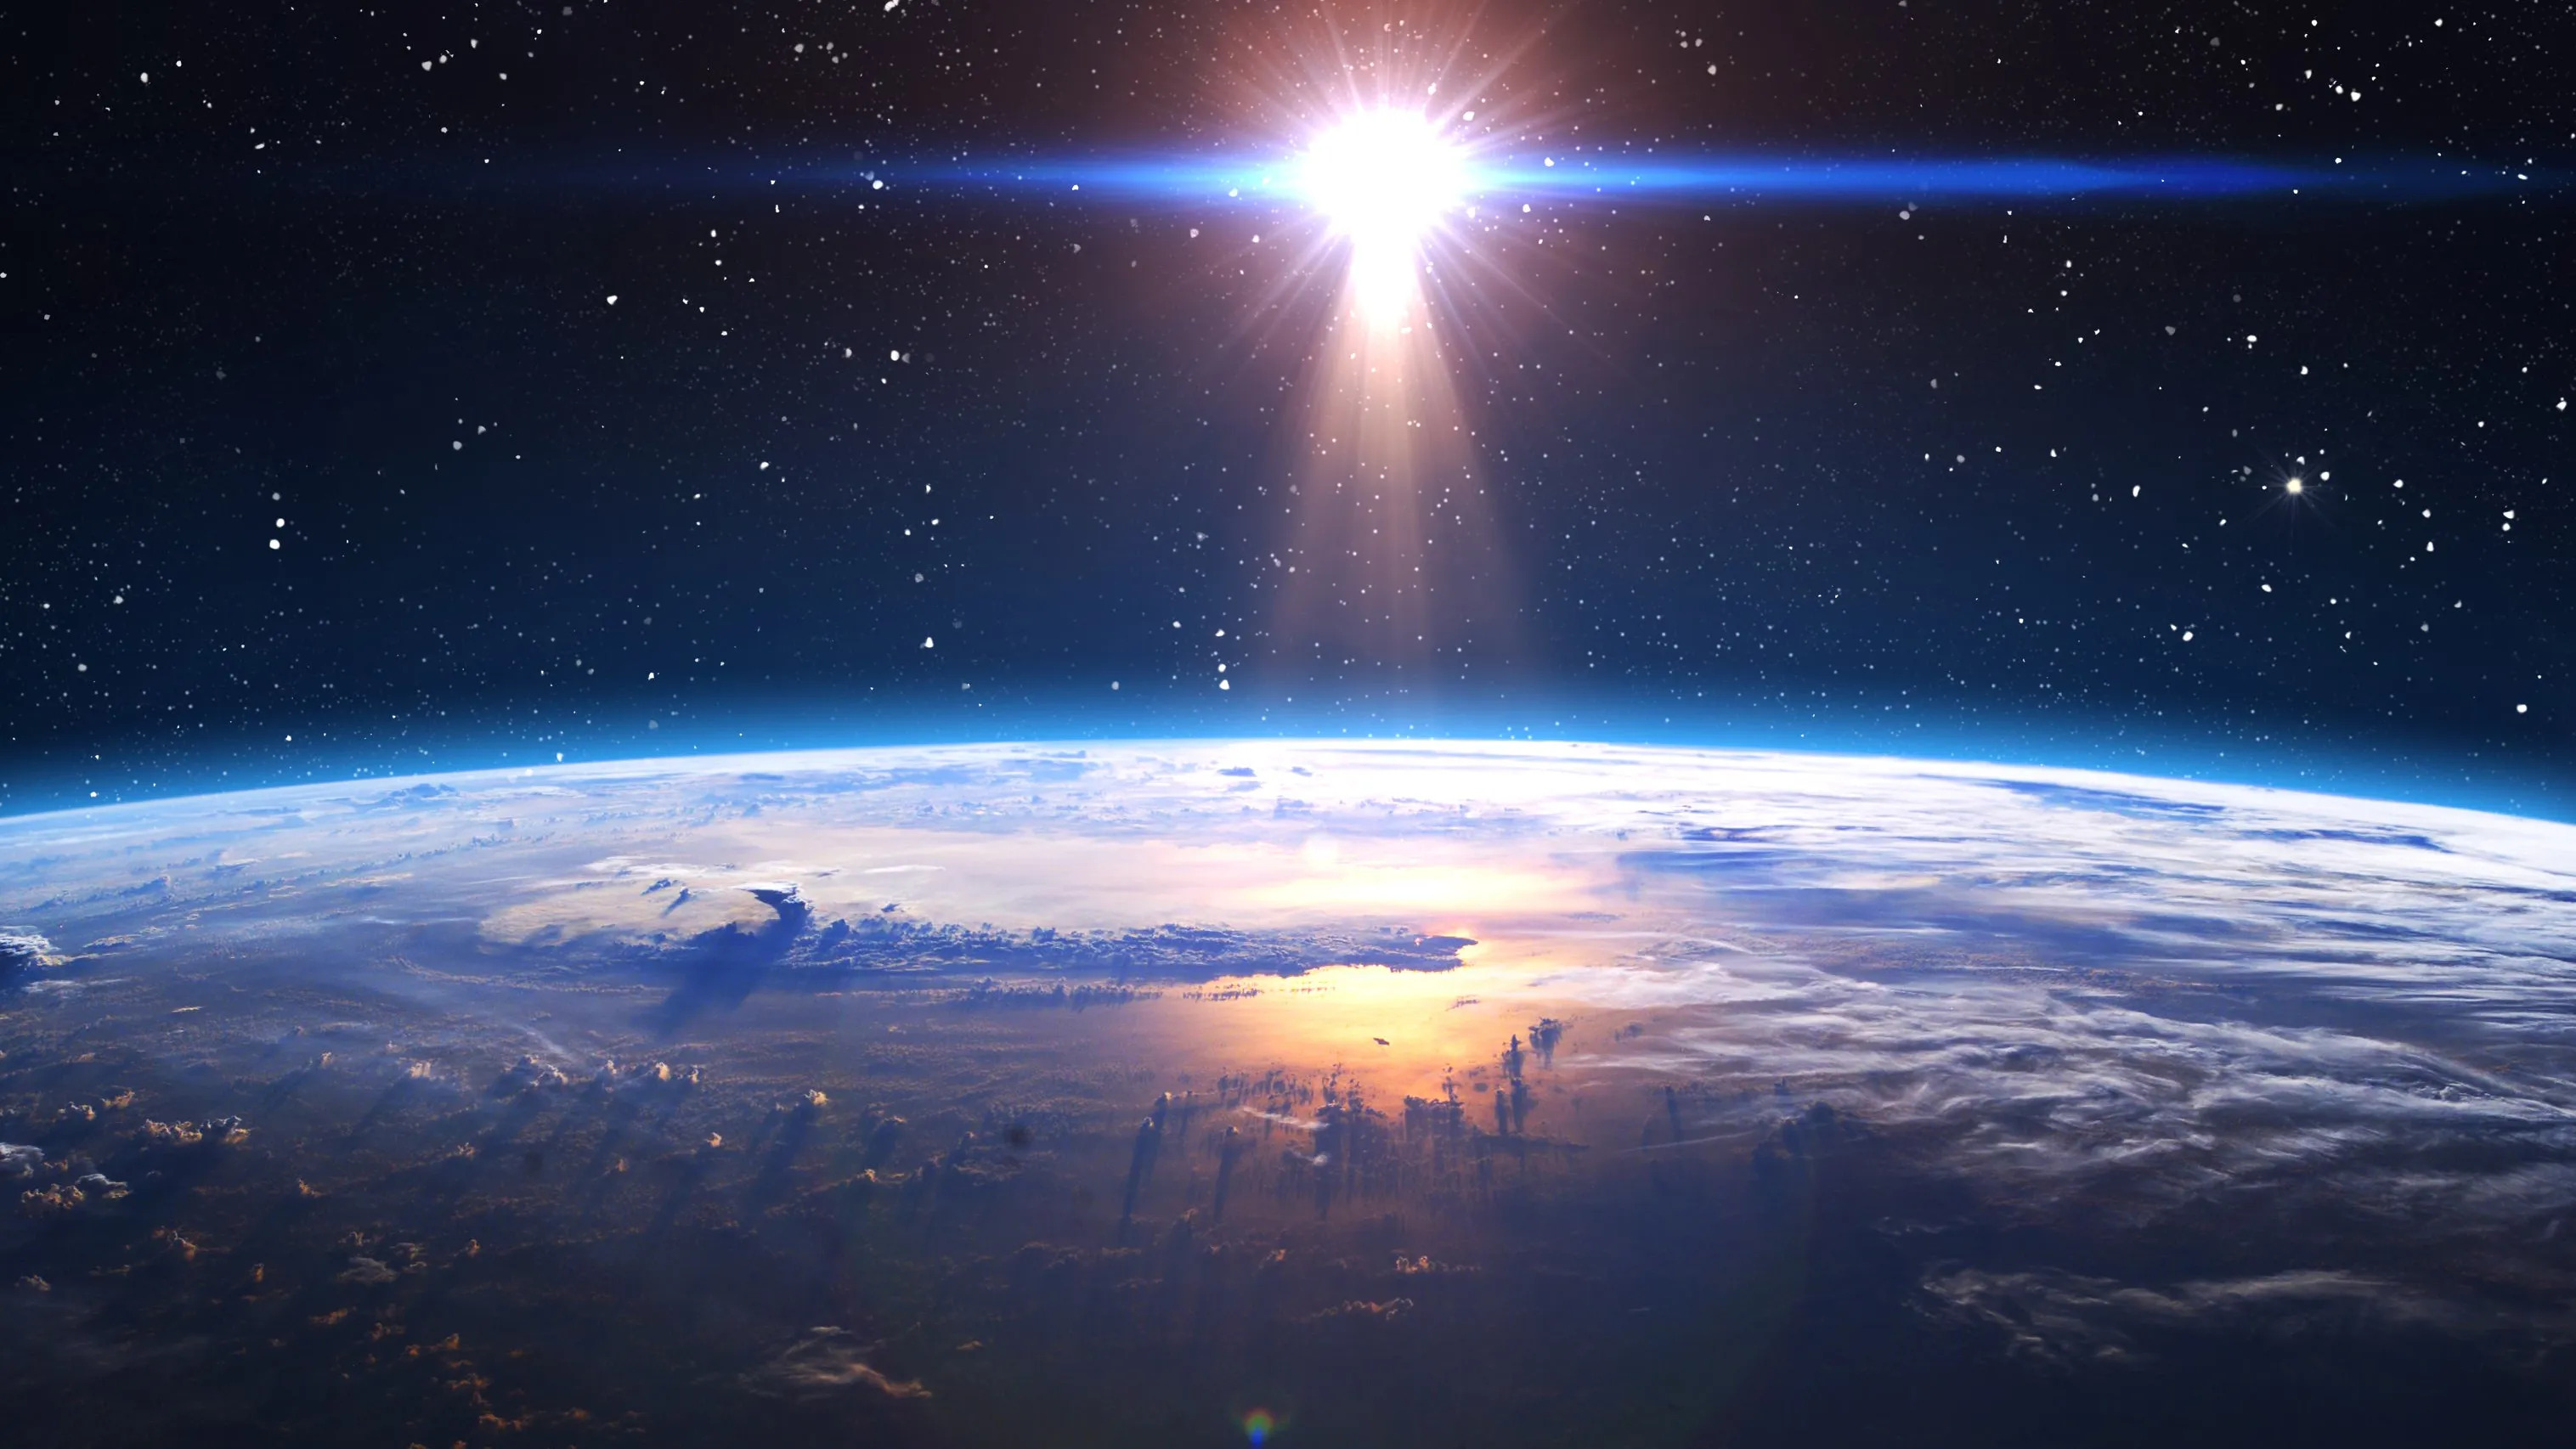

In [2]:
Image('space.jpg', width=400, height=400)

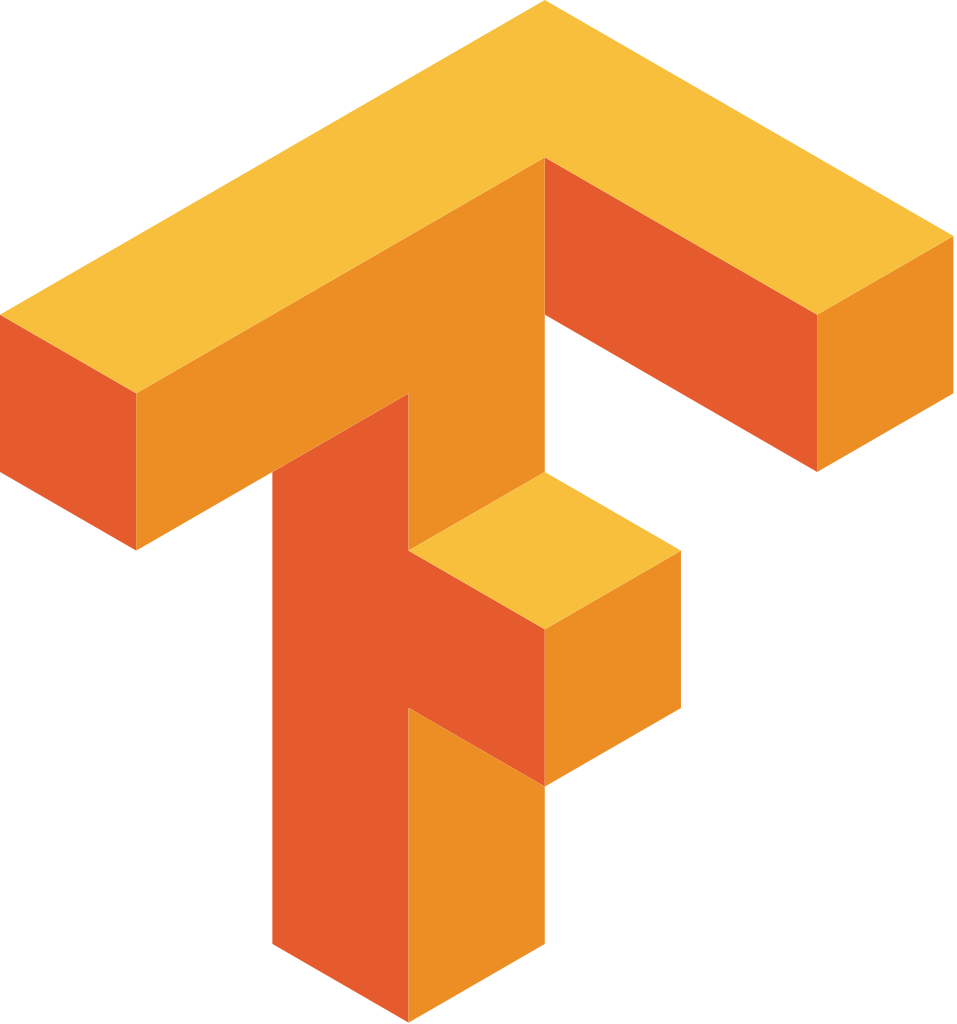

In [3]:
Image('tensorflow_logo.png', width=400, height=400)

In [4]:
logo = cv2.imread('tensorflow_logo.png', cv2.IMREAD_UNCHANGED)
logo.shape

(1024, 957, 4)

In [5]:
logo = cv2.resize(logo, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
logo.shape

(512, 478, 4)

In [6]:
logo_h, logo_w = logo.shape[0], logo.shape[1]

In [7]:
space_img = cv2.imread('space.jpg', cv2.IMREAD_COLOR)
space_h, space_w = space_img.shape[0],space_img.shape[1]

In [8]:
# putting the picture in middle of space
cx = int(space_w / 2)
cy = int(space_h / 2)

In [9]:
tlc_x = int(cx - logo_w / 2)
tlc_y = int(cy - logo_h / 2)

In [10]:
brc_x = int(cx + logo_w / 2)
brc_y = int(cy + logo_h / 2)

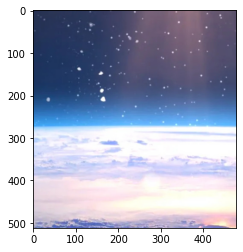

In [11]:
roi = space_img[tlc_y:brc_y, tlc_x:brc_x, :]
roi_2 = roi.copy()
space_2 = space_img.copy()
plt.imshow(roi[:, :, ::-1]);

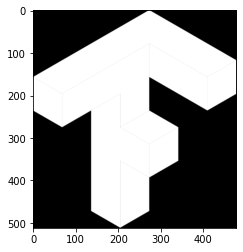

In [12]:
alpha = logo[:,:,3]
plt.imshow(alpha)

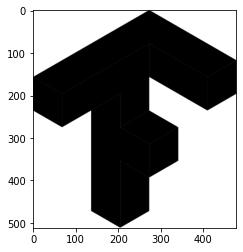

In [13]:
inverse_logo_bin = cv2.bitwise_not(alpha)
plt.imshow(inverse_logo_bin)

In [14]:
logo_mask = cv2.merge([inverse_logo_bin,inverse_logo_bin,inverse_logo_bin])

In [15]:
roi.shape

(512, 478, 3)

In [16]:
logo_mask.shape

(512, 478, 3)

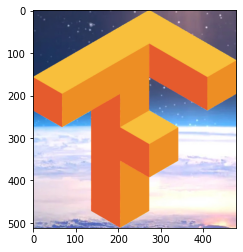

In [17]:
mask_image = cv2.bitwise_and(roi, logo_mask)
mask_image = cv2.bitwise_or(mask_image, logo[:,:,:3])
plt.imshow(mask_image[:,:,::-1])

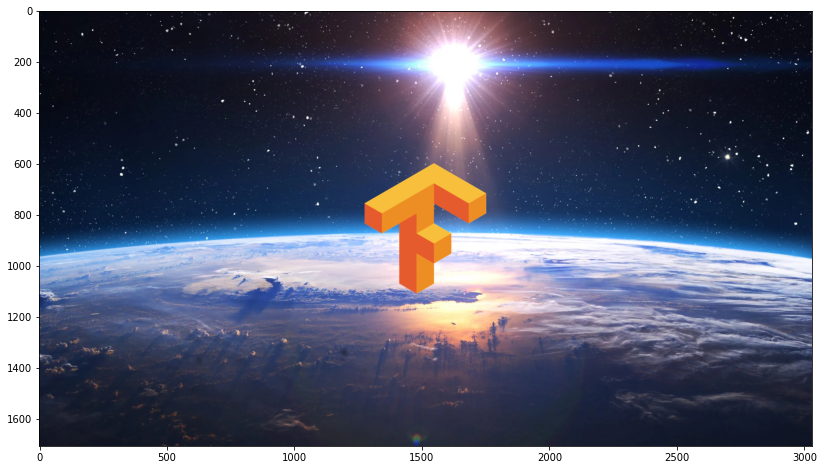

In [18]:
space_img[tlc_y:brc_y, tlc_x:brc_x, :] = mask_image
plt.figure(figsize=(15, 8))
plt.imshow(space_img[:,:,::-1])

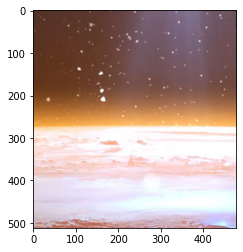

In [19]:
plt.imshow(roi_2)

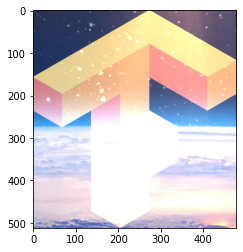

In [20]:
water_marked = cv2.addWeighted(roi_2, 1, logo[:,:,:3], 0.8, 0)
plt.imshow(water_marked[:,:,::-1])

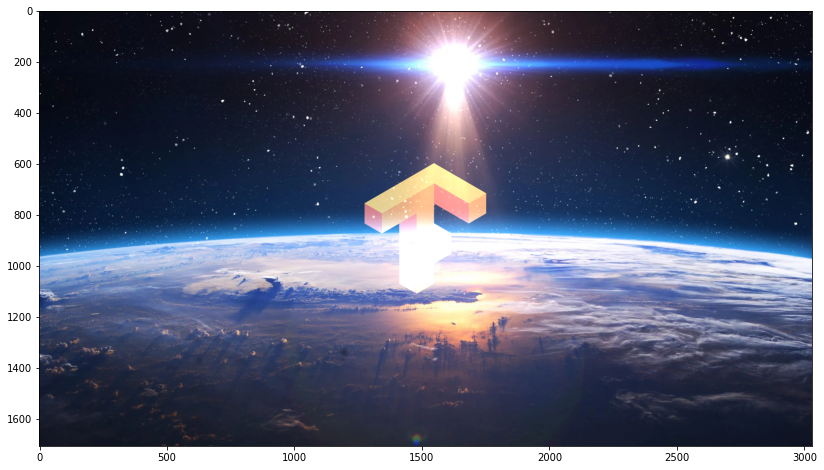

In [21]:
space_img[tlc_y:brc_y, tlc_x:brc_x, :] = water_marked
plt.figure(figsize=(15, 8))
plt.imshow(space_img[:,:,::-1])

# E-Signeture

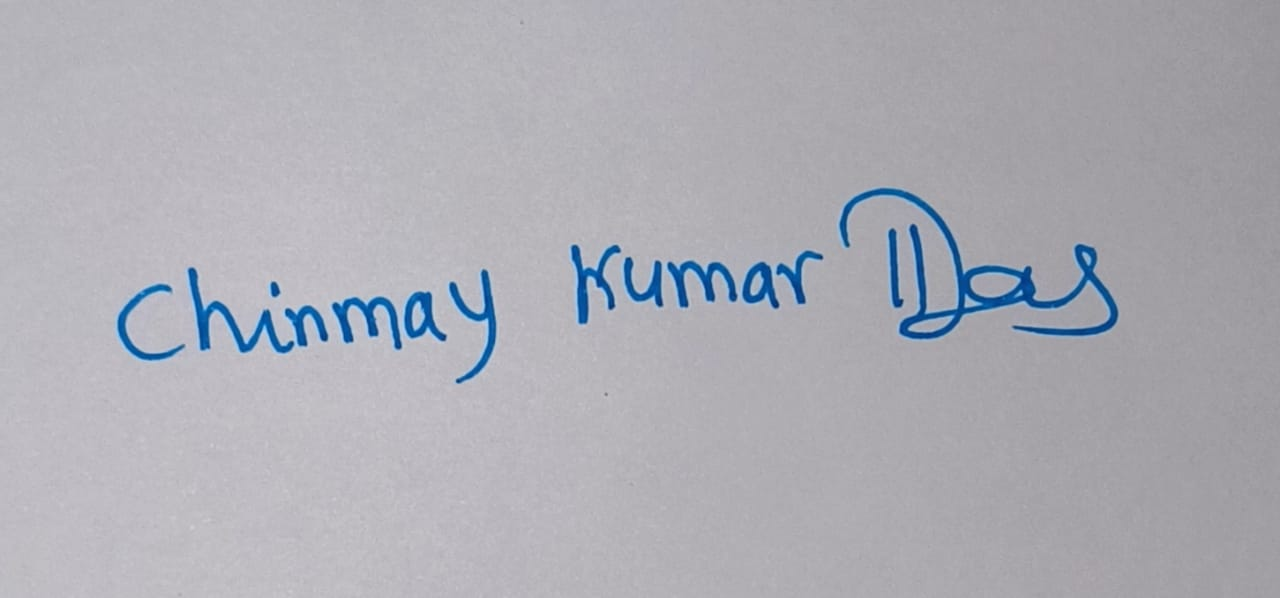

In [22]:
Image('signeture.jpeg')

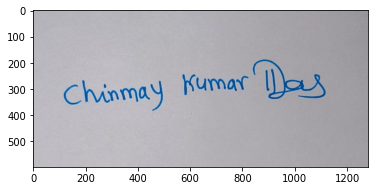

In [23]:
sign = cv2.imread('signeture.jpeg', cv2.IMREAD_UNCHANGED)
plt.imshow(sign[:,:,::-1])

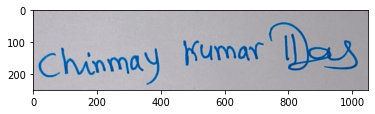

In [24]:
sign_cropped = sign[150:400,100:1150,:]
plt.imshow(sign_cropped[:,:,::-1])

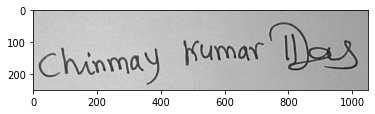

In [25]:
sign_gray = cv2.cvtColor(sign_cropped, cv2.COLOR_RGB2GRAY)
plt.imshow(sign_gray)

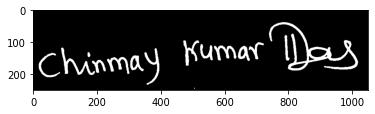

In [26]:
retVal, bin_img = cv2.threshold(sign_gray, 150, 255, cv2.THRESH_BINARY_INV)
plt.imshow(bin_img)

In [27]:
b, g, r = cv2.split(sign_cropped)

In [28]:
sign_alpha = cv2.merge([b, g, r, bin_img])

In [29]:
cv2.imwrite('esign.png',sign_alpha)

True

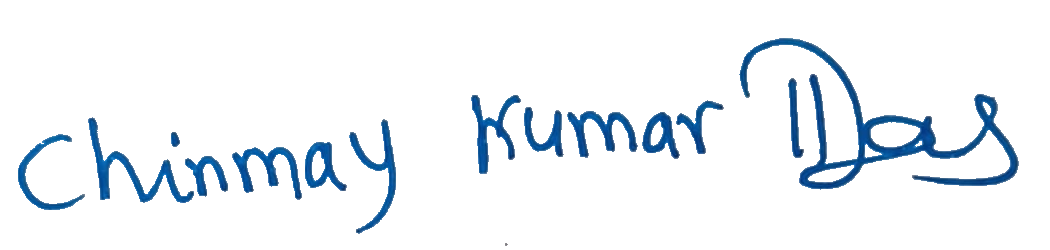

In [30]:
Image('esign.png')